In [ ]:
import torch
import numpy as np
import sklearn.svm as skl
import math
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from torchvision.transforms import Compose, ToTensor, Normalize
from torch.utils.data import DataLoader
from torchvision import datasets
import matplotlib.pyplot as plt

plt.style.use('classic')

# Ex 1.1

In [ ]:
n = 1000

pi = 0.5
mu_1 = 1
mu_2 = -1
sigma_1 = 0.5
sigma_2 = 0.5

X = []
U = np.random.uniform(0, 1, n)

for u in U:
  if u < pi:
    X.append(np.random.normal(mu_1, sigma_1))
  else:
    X.append(np.random.normal(mu_2, sigma_2))

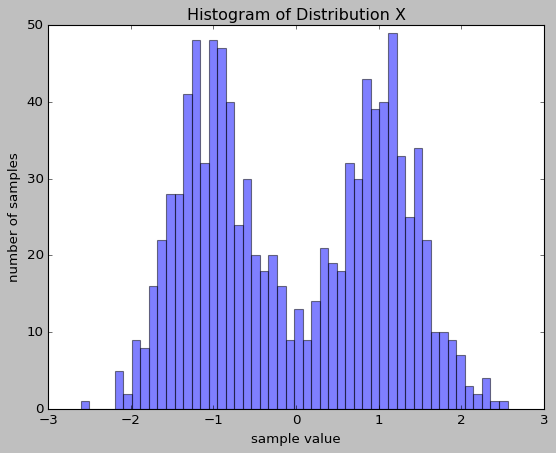

In [ ]:
num_bins = 50
plt.title("Histogram of Distribution X")
plt.xlabel("sample value")
plt.ylabel("number of samples")
n, bins, patches = plt.hist(X, num_bins, facecolor='blue', alpha=0.5)
plt.show()

# Ex 1.2

The cumulative of the any normal distribution (with mean mu and sd sigma) is: 
$ F(x) = \frac{1}{2} * [1 + erf(\frac{(x - mu)}{sigma*sqrt(2)})]$

In [ ]:
from sympy import solve
from scipy import special
from scipy.stats import norm

def GMMinv(X, num_bins=50):
  U = []
  for x in X:
    F_xi = 0.5* (0.5 * (1 + special.erf( (x-1)/(0.5*math.sqrt(2)) ) ) ) + \
            0.5 * (0.5 * (1 + special.erf((x+1)/(0.5*math.sqrt(2))) ) )

    # ppf is percent point function, which is the quantile function
    ui = norm.ppf(F_xi)
    U.append(ui)

  plt.title("Histogram of Distribution U")
  plt.xlabel("sample value")
  plt.ylabel("number of samples")
  n, bins, patches = plt.hist(U, num_bins, facecolor='blue', alpha=0.5)
  plt.show()

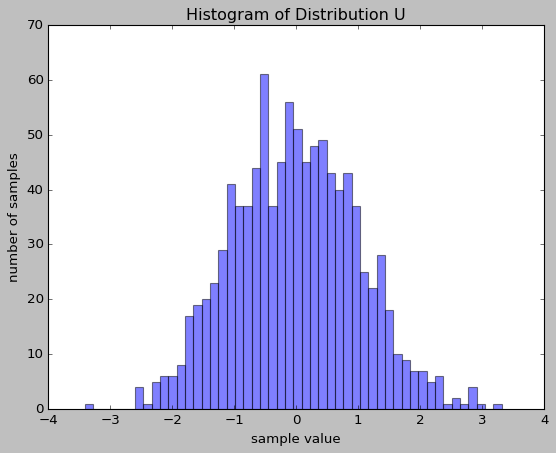

In [ ]:
GMMinv(X, num_bins=50)

U should approximately follow the standard normal distribution. 

# Ex 1.3

$T(z) = Q(\Phi(z))$, where phi is the cdf of the standard normal distribution, and $Q = F^{-1}$ is the quantile function of $X ~ p$ (in Ex 1.1)

Since we cannot get a closed form $Q$ (quantile function of GMM), we need to numerically computer $T(z)$ with binary search.

$x = T(z)$, so $z = T^{-1}(x)$, and $ z = T^{-1}(x) = \Phi^{-1}(Q^{-1}(x))$

We use binary search to solve for $x$ given $z$ and $T^{-1}$

Note: The input of a quantile function is (-1, 1) since it's the probability. The output is the value of the sample that lies at the cutoff of the input probability.

In [ ]:
# The cdf of X (x is the sample from the GMM distribution in Ex1.1)
def T_inv(x): 
  F_x = 0.5* (0.5 * (1 + special.erf( (x-1)/(0.5*math.sqrt(2)) ) ) ) + \
      0.5 * (0.5 * (1 + special.erf((x+1)/(0.5*math.sqrt(2))) ) )
  phi_inv = norm.ppf(F_x)

  return phi_inv

def BinarySearch(F, z, lb=-100, ub=100, maxiter=100, tol=1e-5):
  while F(lb) > z:
    ub = lb
    lb = lb*2
  while F(ub) < z:
    lb = ub
    ub = ub*2

  for i in range(maxiter):
    x = (lb + ub)/2
    t = F(x)
    if t > z:
      ub = x
    else:
      lb = x
    if abs(t - z) <= tol:
      break

  return x

def calculate_target_sample_val(BinarySearch, F, Z):
  X = []
  for z_i in Z:
    x_i = BinarySearch(T_inv, z_i)
    X.append(x_i)
    
  return X


Z = [round(num, 1) for num in np.arange(-5.0, 5.0, 0.1)]
X = calculate_target_sample_val(BinarySearch, T_inv, Z)

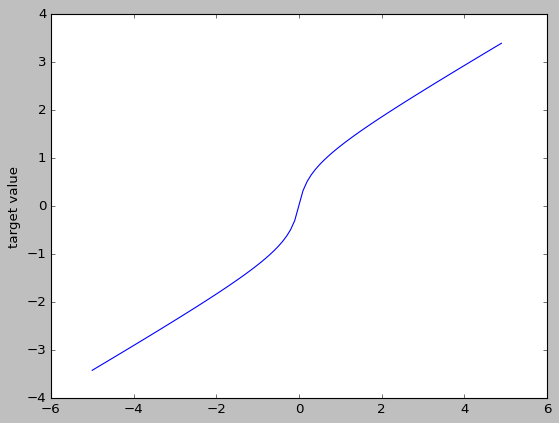

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Z, X)
plt.ylabel('target value')
plt.show()

In [ ]:
Z = np.random.normal(0, 1, 1000)

def PushForward(Z):
  target_dist = calculate_target_sample_val(BinarySearch, BinarySearch, Z)
  return target_dist

X_bar = PushForward(Z)

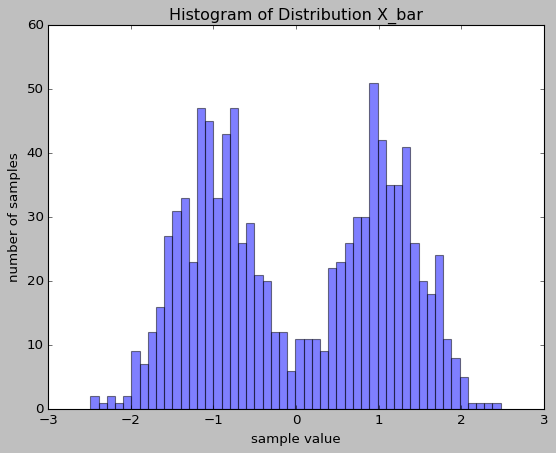

In [ ]:
num_bins = 50
plt.title("Histogram of Distribution X_bar")
plt.xlabel("sample value")
plt.ylabel("number of samples")
n, bins, patches = plt.hist(X_bar, num_bins, facecolor='blue', alpha=0.5)
plt.show()

The histogram is very similar to the one in Ex 1.1. 

# Ex 1.5

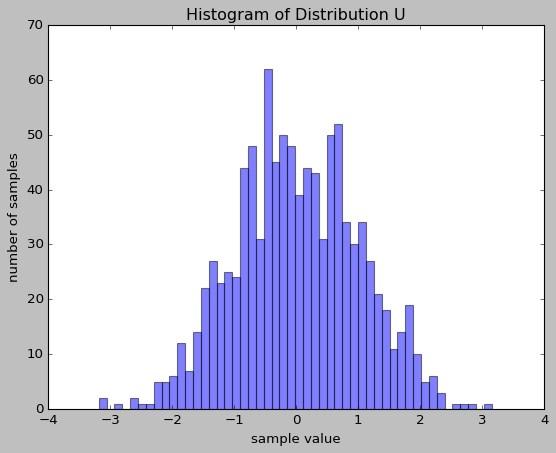

In [ ]:
GMMinv(X_bar, num_bins=50)

$\bar{U_i}$ should follow the standard normal distribution.